# DBSCAN

DBSCAN is a density cluster algorithm. This algorithm assume that there is cluster where the density points is high (there isn't centroids in DBSCAN). DBSCAN define three kinds of points:
* The core: is that one that satisfy the number of points around him that we fix (min_samples) in the radius that we define (epsilon)
* Reachables: those  points that are not core but have a core inside their radius
* Noise: the points that don't have cluster

Actually DBSCAN and HDBSCAN are the most powerful methods for clustering

In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

## Dataset 
This dataset is a synthetic dataset created by the library HDBSCAN, so we can´t extract conclusions about the data, but it will show us how good is DBSCAN and HDBSCAN for clustering

In [25]:
df_cluster = pd.DataFrame(np.load('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/DBSCAN/clusterable_data.npy'),
                          columns=['x', 'y'])
df_cluster[:5]

,x,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


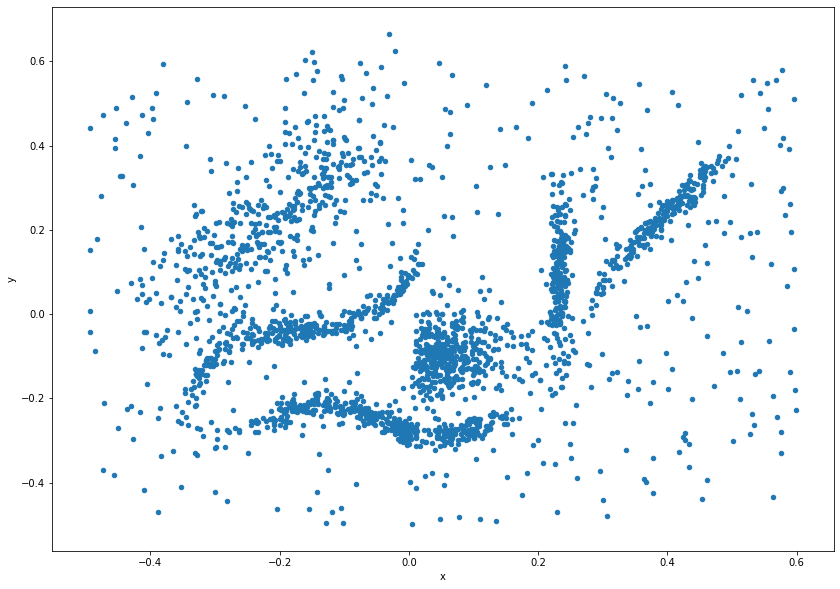

In [26]:
df_cluster.plot(kind='scatter',
               x='x',
               y='y',
               figsize=(14,10))

## Hyperparameters
* eps: epsilon, the maximun distance between two samples. This parameter change the density function of the algorithm and help us to increase/decrease the number of clusters
* min_samples: number of samples necesary for a point being core
* metric: the metric that the algorithm use to compute distance, could be euclidian or a sparse matrix precomputed by ourselves
* algorithm: this algorithm use neighbours aproximations to compute pointwise distances and  find the nearest neighbors, as we saw in KNN we have 4 kind of algorithms that compute distances:
    * brute: it's use a brute-force search wich means that our algorithm will compute all the distances between all points
    * kd_tree: it's recommended if we have a medium data dataset. Based on trees the idea of this algorithm is simple, if we know that a point A** is very distant from point **B and point B** very close to point **C then we know that points A** and **C are very distant. This saves us computer time.
    * ball_tree: it's very simmilar to kd_tree but works better if we have a big dataset
    * auto: the algorithm will choose the best kernel for our dataset.
* leaf_size: if you choose a kernel based on trees, then you can set the number of leaf
* P: The power of the Minkowski metric to be used to calculate distance
    between points.

In [27]:
dbscan = DBSCAN(eps=0.033,
               min_samples=22,
               algorithm='brute',
               p=0.9)
preds = dbscan.fit_predict(df_cluster)

In [28]:
len(dbscan.core_sample_indices_)

1364

In [29]:
#Our sihouette score is bad
silhouette_score(df_cluster, preds)

0.19592842860298926

In [116]:
#but our harabasz score is good
calinski_harabasz_score(df_cluster, preds)

360.0211550733057

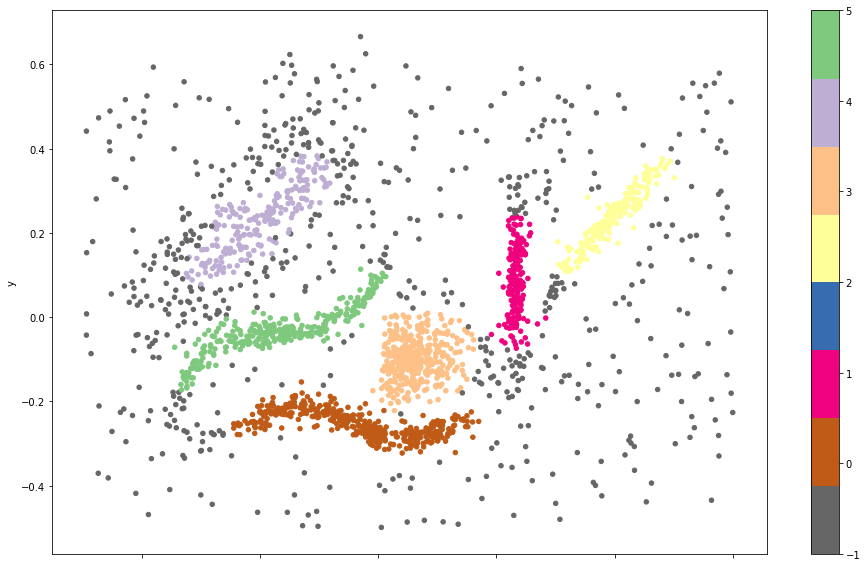

In [30]:
df_cluster.plot(kind='scatter', x='x', y='y', c=preds, cmap='Accent_r', figsize=(16,10))
pass

## Conclusions of DBSCAN algorithm

### Pros
* Is one of the most powerfull algorithm for cluster
* Clusters (Components are called in this algorithm) don't have to be spherical
* With the hyperparameters the model infer the cluster, we don't need to pass a number of clusters
* It's very robust with outliers.
* The algorithm discard point that not meet the needs of density and distance (the gray points)

### Cons

* It's not deterministic, the solutions will be differents in each train.
* The clusters must have all the same density.

# HDBSCAN
Is a model very similar to DBSCAN, we need to install the HDBSCAN package because this algorithm is not in Scikit Learn. We are going to explain only the new parameters.

One advantage that have HDBSCAN is that can create clusters with differents densitys.

## Hyperparameters
* min_cluster_size: the minimum number of points that a cluster can have
* alpha: the documentation of HDBSCAN strongly recommend us that we shouldn't change this parameter, but if we don't reach the results that we want, we can change it. This parameter allow us to determine how conservative, is the algorithm creating clustering, a higher number, more convservative is the clustering
* allow_single_cluster: if you want that HDBSCAN have the possibility to creat only one cluster.

In [31]:
from hdbscan import HDBSCAN

In [112]:
hdbscan = HDBSCAN(min_cluster_size=20,
                 min_samples=10)
preds_2 = hdbscan.fit_predict(df_cluster)

In [113]:
silhouette_score(df_cluster, preds_2)

0.24084637307209775

In [114]:
calinski_harabasz_score(df_cluster, preds_2)

450.0667461288014

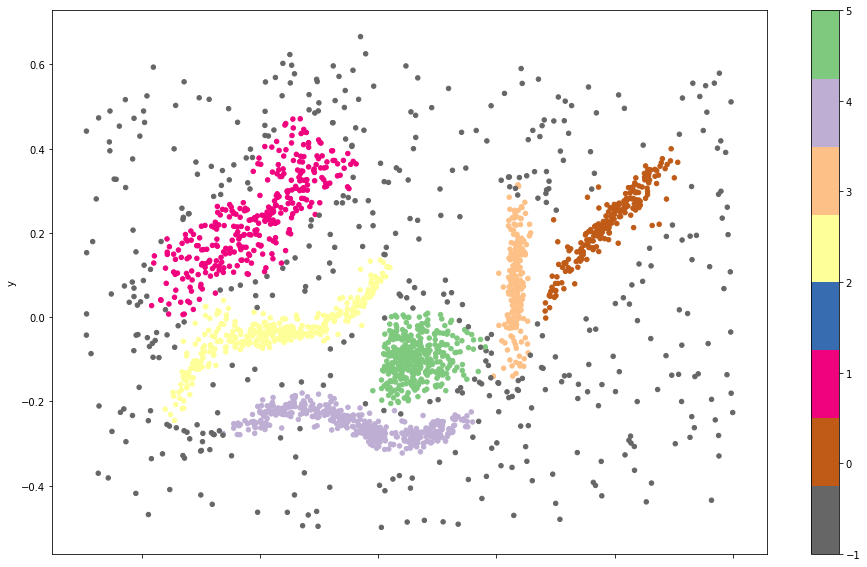

In [115]:
df_cluster.plot(kind='scatter', x='x', y='y', c=preds_2, cmap='Accent_r', figsize=(16,10))
pass

## Conclusions of HDBSCAN algorithm

### Pros
* Is one of the most powerfull algorithm for cluster
* Clusters (Components are called in this algorithm) don't have to be spherical
* With the hyperparameters the model infer the cluster, we don't need to pass a number of clusters
* It's very robust with outliers.
* The algorithm discard point that not meet the needs of density and distance (the gray points)
* As you can see **the clusters have different density**

### Cons

* It's not deterministic, the solutions will be differents in each train.